In [1]:
import pymysql
import pandas as pd

In [2]:
db_config={
    "host":"localhost",       # or your DB host
    "user":"root",   # your MySQL username
    "password":"1234",  # your MySQL password
    "database":"sales"   # your DB name
}

In [3]:
# SQL Queries
queries = {
    "question1: During the transactions that occurred in year 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source: order_detail":
    """SELECT 
        DATE_FORMAT(order_date, '%m') AS Month_ID,
        DATE_FORMAT(order_date, '%M') AS Month,
        DATE_FORMAT(order_date, '%Y') AS Year,
        SUM(after_discount) AS total_transactions
    FROM order_detail
    WHERE YEAR(order_date) = 2021 AND is_valid = 1
    GROUP BY Month_ID, Month, Year
    ORDER BY total_transactions DESC
    LIMIT 3;
    """,

    "question2: During the transactions that occurred in year 2022, which Category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source: order_detail, sku_detail":
    """SELECT 
        skudet.category,
        DATE_FORMAT(ordet.order_date, "%Y") AS year,
        SUM(ordet.after_discount) AS total_transaction
    FROM order_detail AS ordet
    JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
    WHERE ordet.is_valid = 1 AND YEAR(ordet.order_date) = 2022
    GROUP BY year, skudet.category
    ORDER BY total_transaction DESC;
    """,

    "question3: Compare transaction values of each category in 2021 & 2022. Mention which categories increased or decreased. Use is_valid = 1. Source: order_detail, sku_detail":
    """WITH final_table AS (
        SELECT 
            skudet.category,
            SUM(CASE WHEN EXTRACT(YEAR FROM ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
            SUM(CASE WHEN EXTRACT(YEAR FROM ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
        FROM order_detail AS ordet
        JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE ordet.is_valid = 1
        GROUP BY 1
        ORDER BY 1
    )
    SELECT *,
           (transaction_2022 - transaction_2021) AS delta,
           CASE WHEN transaction_2022 > transaction_2021 THEN "Increase" ELSE "Decrease" END AS Remark
    FROM final_table;
    """,

    "question4: Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1. Source: order_detail, payment_detail":
    """SELECT 
        paydet.payment_method,
        DATE_FORMAT(ordet.order_date,'%Y') AS Year,
        COUNT(DISTINCT ordet.id) AS freq
    FROM order_detail AS ordet
    JOIN payment_detail AS paydet ON ordet.payment_id = paydet.id
    WHERE ordet.is_valid = 1 AND YEAR(ordet.order_date) = 2022
    GROUP BY paydet.payment_method, DATE_FORMAT(ordet.order_date,'%Y')
    ORDER BY freq DESC
    LIMIT 5;
    """,

    "question5: Sort these 5 products by transaction value: Samsung, Apple, Sony, Huawei, Lenovo. Use is_valid = 1":
    """WITH final_table AS (
        SELECT 
            CASE 
                WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                WHEN LOWER(skudet.sku_name) LIKE '%apple%' OR LOWER(skudet.sku_name) LIKE '%iphone%' OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
            END AS product_brand,
            SUM(ordet.after_discount) AS total_transaction
        FROM order_detail AS ordet
        JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE ordet.is_valid = 1
        GROUP BY product_brand
    )
    SELECT * 
    FROM final_table
    WHERE product_brand IS NOT NULL
    ORDER BY total_transaction DESC;
    """
}



In [4]:
from IPython.display import display

In [5]:
# connect with the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connected successfully")
    # Execute each query & and  display results
    for question, query in queries.items():
        print(f"\n---{question}---")
        df=pd.read_sql(query, connection)
        display(df)
except Exception as e:
    print(f" An error Occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")
    

Database connected successfully

---question1: During the transactions that occurred in year 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source: order_detail---


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\2485524058.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transactions
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08



---question2: During the transactions that occurred in year 2022, which Category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source: order_detail, sku_detail---


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\2485524058.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, connection)


,category,year,total_transaction
0,Mobiles & Tablets,2022,9.128256e+08
1,Entertainment,2022,3.611392e+08
2,Appliances,2022,3.095840e+08
3,Computing,2022,2.124082e+08
4,Men Fashion,2022,1.333326e+08
5,Women Fashion,2022,9.023613e+07
6,Home & Living,2022,7.865896e+07
7,Health & Sports,2022,5.200838e+07
8,Beauty & Grooming,2022,4.559842e+07
9,Superstore,2022,3.264327e+07



---question3: Compare transaction values of each category in 2021 & 2022. Mention which categories increased or decreased. Use is_valid = 1. Source: order_detail, sku_detail---


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\2485524058.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,Remark
0,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,Increase
1,Beauty & Grooming,4.450769e+07,4.559842e+07,1.090731e+06,Increase
2,Books,1.012460e+07,6.792519e+06,-3.332077e+06,Decrease
3,Computing,1.728789e+08,2.124082e+08,3.952934e+07,Increase
4,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,Increase
5,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,Increase
6,Home & Living,4.438511e+07,7.865896e+07,3.427385e+07,Increase
7,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,Increase
8,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,Increase
9,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,Increase


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\2485524058.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, connection)



---question4: Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1. Source: order_detail, payment_detail---


,payment_method,Year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



---question5: Sort these 5 products by transaction value: Samsung, Apple, Sony, Huawei, Lenovo. Use is_valid = 1---


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\2485524058.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed.


In [6]:
import os

In [7]:
db_config={
    "host":"localhost",       # or your DB host
    "user":"root",   # your MySQL username
    "password":"1234",  # your MySQL password
    "database":"sales"   # your DB name
}

In [8]:
# Folder path to save CSV files
output_folder = r"C:\Users\Yogita\OneDrive\Desktop\Google Looker project\dataset"  # Replace with your folder path
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

In [9]:
# List of tables to export
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]  # Add your table names here

In [10]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: order_detail


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table order_detail exported successfully to C:\Users\Yogita\OneDrive\Desktop\Google Looker project\dataset\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\Yogita\OneDrive\Desktop\Google Looker project\dataset\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\Yogita\OneDrive\Desktop\Google Looker project\dataset\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\Yogita\OneDrive\Desktop\Google Looker project\dataset\customer_detail.csv.
Database connection closed.


In [11]:
df_od = pd.read_csv(r"C:\Users\Yogita\OneDrive\Desktop\Google Looker Project\dataset\order_detail.csv")
df_sd = pd.read_csv(r"C:\Users\Yogita\OneDrive\Desktop\Google Looker Project\dataset\sku_detail.csv")
df_pd = pd.read_csv(r"C:\Users\Yogita\OneDrive\Desktop\Google Looker Project\dataset\payment_detail.csv")
df_cd = pd.read_csv(r"C:\Users\Yogita\OneDrive\Desktop\Google Looker Project\dataset\customer_detail.csv")

In [12]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [13]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5764 non-null   object 
 1   customer_id      5764 non-null   object 
 2   order_date       5764 non-null   object 
 3   sku_id           5764 non-null   object 
 4   price            5764 non-null   int64  
 5   qty_ordered      5764 non-null   int64  
 6   before_discount  5764 non-null   float64
 7   discount_amount  5764 non-null   float64
 8   after_discount   5764 non-null   float64
 9   is_gross         5764 non-null   int64  
 10  is_valid         5764 non-null   int64  
 11  is_net           5764 non-null   int64  
 12  payment_id       5764 non-null   int64  
 13  sku_name         5764 non-null   object 
 14  base_price       5764 non-null   float64
 15  cogs             5764 non-null   float64
 16  category         5764 non-null   object 
 17  registered_dat

In [15]:
print(df_pd.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [16]:
print(df_od.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [17]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     16 non-null     object 
 1   payment_method   16 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 2.0+ KB


In [18]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5764 non-null   object        
 1   customer_id      5764 non-null   object        
 2   order_date       5764 non-null   datetime64[ns]
 3   sku_id           5764 non-null   object        
 4   price            5764 non-null   int64         
 5   qty_ordered      5764 non-null   int64         
 6   before_discount  5764 non-null   float64       
 7   discount_amount  5764 non-null   float64       
 8   after_discount   5764 non-null   float64       
 9   is_gross         5764 non-null   int64         
 10  is_valid         5764 non-null   int64         
 11  is_net           5764 non-null   int64         
 12  payment_id       5764 non-null   int64         
 13  sku_name         5764 non-null   object        
 14  base_price       5764 non-null   float64

Question 1
Dear Data Analyst,

As part of our Year-End Festival competition, the company plans to award prizes to our top customers. To facilitate this, the Marketing Team requires an analysis to estimate the prizes for the winners. Specifically, we need data on the TOP 5 Products in the Mobiles & Tablets Category for the year 2022, ranked by the highest sales quantities (where valid = 1). We would appreciate it if you could compile and share this information with us before the end of this month to ensure we meet our planning deadlines.

Thank you for your continued support and collaboration.

Best regards, Marketing Teameting Team

In [19]:
# Answer No 1
top_5_prod = pd.DataFrame(\
                          # filter the columns as needed
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregate using groupby method
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value from the largest to the lowest
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 row
                          .head(5).reset_index(drop=True)
                          )
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

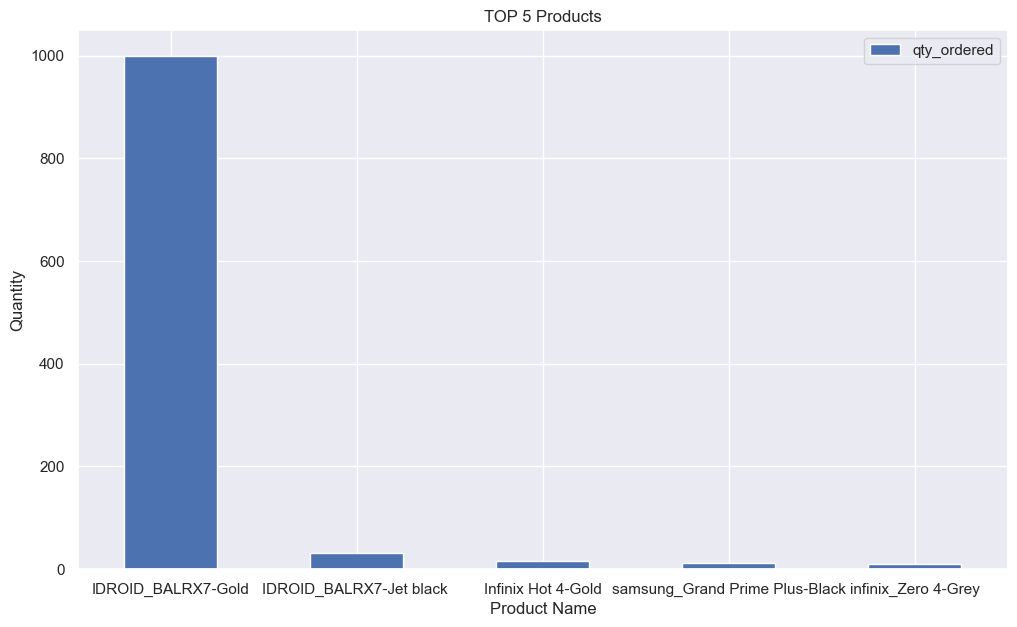

In [20]:
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='bar',
           grid = True,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

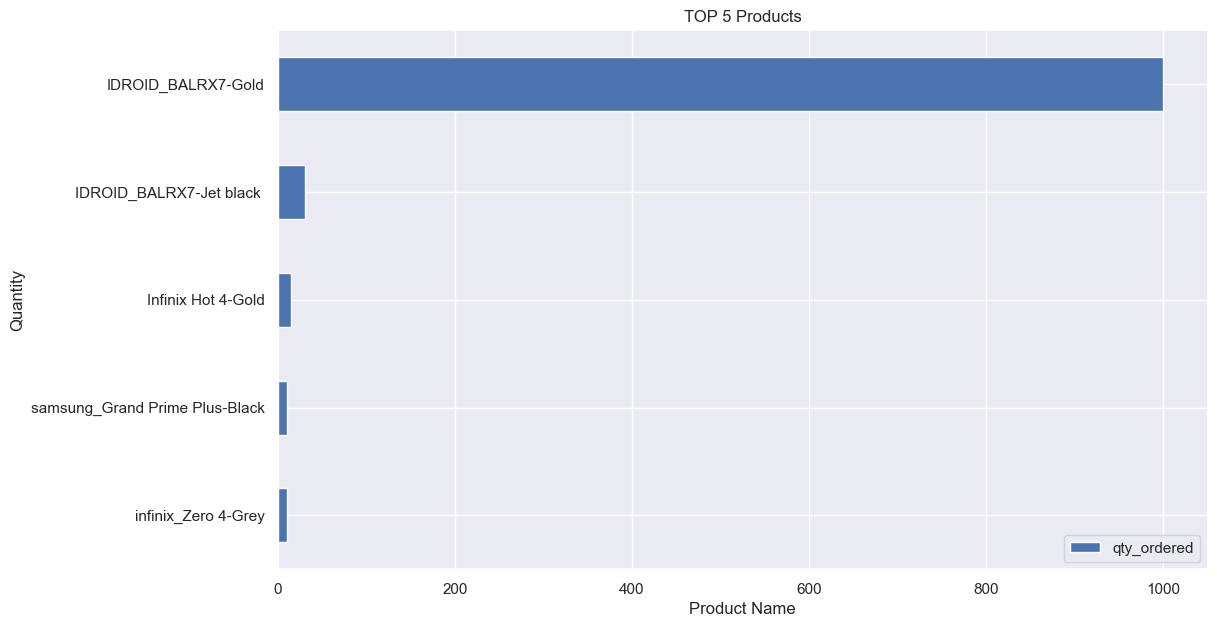

In [21]:
# show the chart
# change sort to ascending to show the highest from top to bottow on horizontal bar chart
top_5_prod.sort_values(by='qty_ordered', ascending=True, inplace=True)

# plot
sns.set()

top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='barh', # barh for horizontal bar chart
           grid = True,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

Question 2
Dear Data Analyst,

Following a recent discussion between the Warehouse and Marketing Teams, we have identified a notable surplus in stock for products in the “Others” category as of the end of 2022.

We kindly request your assistance in analyzing the sales data for this category for 2021, specifically focusing on sales quantity. We suspect there has been a decline in sales quantity in 2022 compared to 2021. (Please also include data for the 15th category.)

If a decrease in sales quantity for the “Others” category is confirmed, we would appreciate it if you could provide details of the top 20 products that experienced the largest decrease in sales between 2022 and 2021. This information will support our discussion in the upcoming meeting.

Please share the requested data within 4 days. We sincerely appreciate your assistance and cooperation.

Best regards, Warehouse Team

In [22]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2021)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

# show
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,124,146
1,Beauty & Grooming,164,152
2,Books,171,195
3,Computing,109,151
4,Entertainment,73,149
5,Health & Sports,168,197
6,Home & Living,189,249
7,Kids & Baby,166,224
8,Men Fashion,235,173
9,Mobiles & Tablets,107,1153


In [23]:
# add new column named 'qty_growth' 
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021'] * 100),2))

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
  if delta < 0:
    return 'DOWN'
  elif delta == 0:
    return 'FAIR'
  else:
    return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,422,254,-168,-39.81,DOWN
1,Soghaat,753,607,-146,-19.39,DOWN
2,Men Fashion,235,173,-62,-26.38,DOWN
3,Beauty & Grooming,164,152,-12,-7.32,DOWN
4,Appliances,124,146,22,17.74,UP
5,Books,171,195,24,14.04,UP
6,Health & Sports,168,197,29,17.26,UP
7,Computing,109,151,42,38.53,UP
8,School & Education,182,235,53,29.12,UP
9,Kids & Baby,166,224,58,34.94,UP


Text(0.5, 0, 'Quantity')

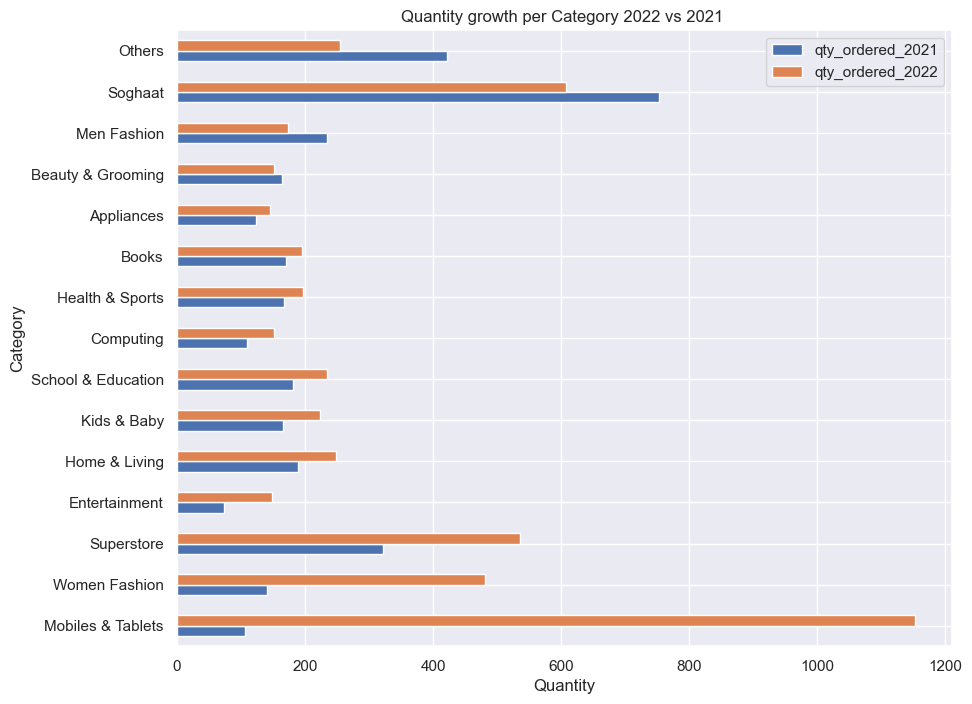

In [24]:
import matplotlib.pyplot as plt
# sort the data before plot
cat_data_2021_2022.sort_values(by='qty_growth',ascending=False,inplace=True)

# Plot to show qty_ordered_2021 and qty_ordered_2022 horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
           y=['qty_ordered_2021','qty_ordered_2022'],\
           kind='barh',\
           figsize=(10 , 8))
plt.title('Quantity growth per Category 2022 vs 2021 ')
plt.ylabel('Category')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

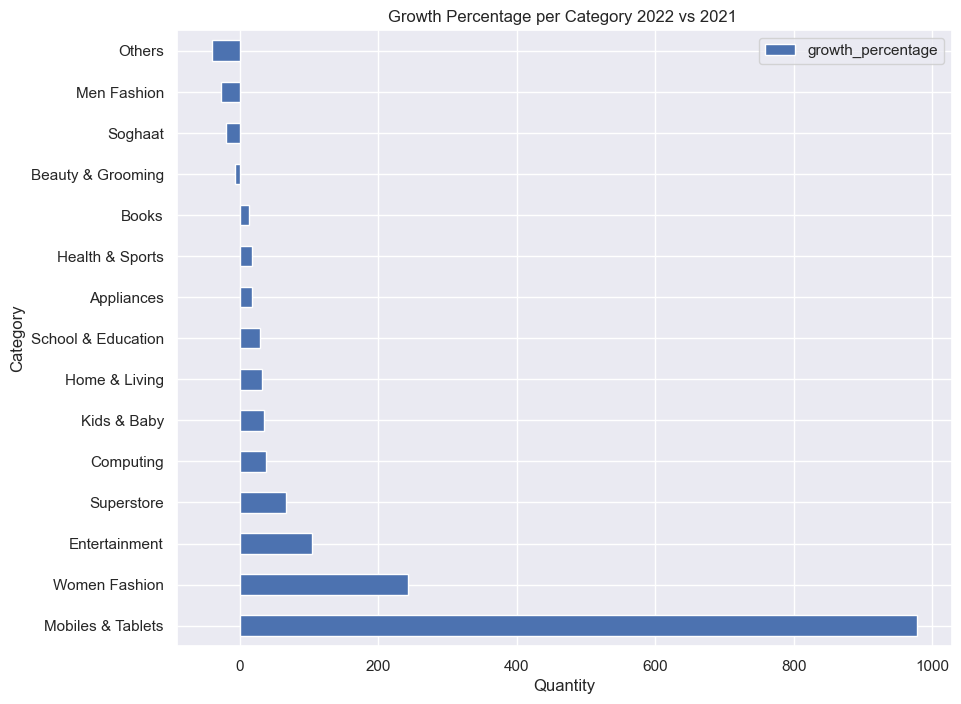

In [25]:
import matplotlib.pyplot as plt
# sort the data before plot
cat_data_2021_2022.sort_values(by='growth_percentage',ascending=False,inplace=True)

# Plot to show qty_ordered_2021 and qty_ordered_2022 horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
           y=['growth_percentage'],\
           kind='barh',\
           figsize=(10 , 8))
plt.title('Growth Percentage per Category 2022 vs 2021 ')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [26]:
# Answer 2.2
# Create the dataframes with the category='Others', year of 2022, is_valid = 1
#  Aggregate the qty_ordered(sum)

others_2022=pd.DataFrame(
    #filter 2022
    df[(df['category']=='Others')& (df['is_valid'] ==1 ) & (df['order_date'].dt.year==2022)]
    # groupby, aggregate qty_ordered, include sku_name(product_name)
    .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
    # convert series to dataframe
    .reset_index(name='qty_ordered_2022')
)
others_2021=pd.DataFrame(
    #filter 2022
    df[(df['category']=='Others')& (df['is_valid'] ==1 ) & (df['order_date'].dt.year==2021)]
    # groupby, aggregate qty_ordered, include sku_name(product_name)
    .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
    # convert series to dataframe
    .reset_index(name='qty_ordered_2021')
)

# Join the dataframes
others_2021_2022= others_2021.merge(others_2022[['sku_name','qty_ordered_2022']], how='outer', on='sku_name')

# show data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,NaN
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,NaN,NaN,1.0
4,Am-PTV_ATS-004-M,Others,5.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0
159,test-product-00,NaN,NaN,1.0
160,tucano_IPD7AN-BK,Others,1.0,NaN


In [27]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['category'].fillna('Others', inplace=True)

# fill "NaN" with 0 in rest of the columns
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\1684364629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  others_2021_2022['category'].fillna('Others', inplace=True)


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,0.0
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,Others,0.0,1.0
4,Am-PTV_ATS-004-M,Others,5.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,1.0
159,test-product-00,Others,0.0,1.0
160,tucano_IPD7AN-BK,Others,1.0,0.0


In [28]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021']=others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add the column "remark" using function "updown_check"
others_2021_2022['Remark']=others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending = True, inplace = True)

# reset the index
others_2021_2022.reset_index(drop= True, inplace = True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,Remark
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,40.0,-160.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,23.0,0.0,-23.0,DOWN
2,Telemall_MM-DR-HB-L,Others,23.0,2.0,-21.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,20.0,0.0,-20.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,13.0,0.0,-13.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,7.0,7.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,8.0,8.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,13.0,13.0,UP
160,SKMT_Medicine,Others,0.0,20.0,20.0,UP


C:\Users\Yogita\AppData\Local\Temp\ipykernel_17336\1113092396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending= False, inplace= True)


Text(0, 0.5, 'Product Name')

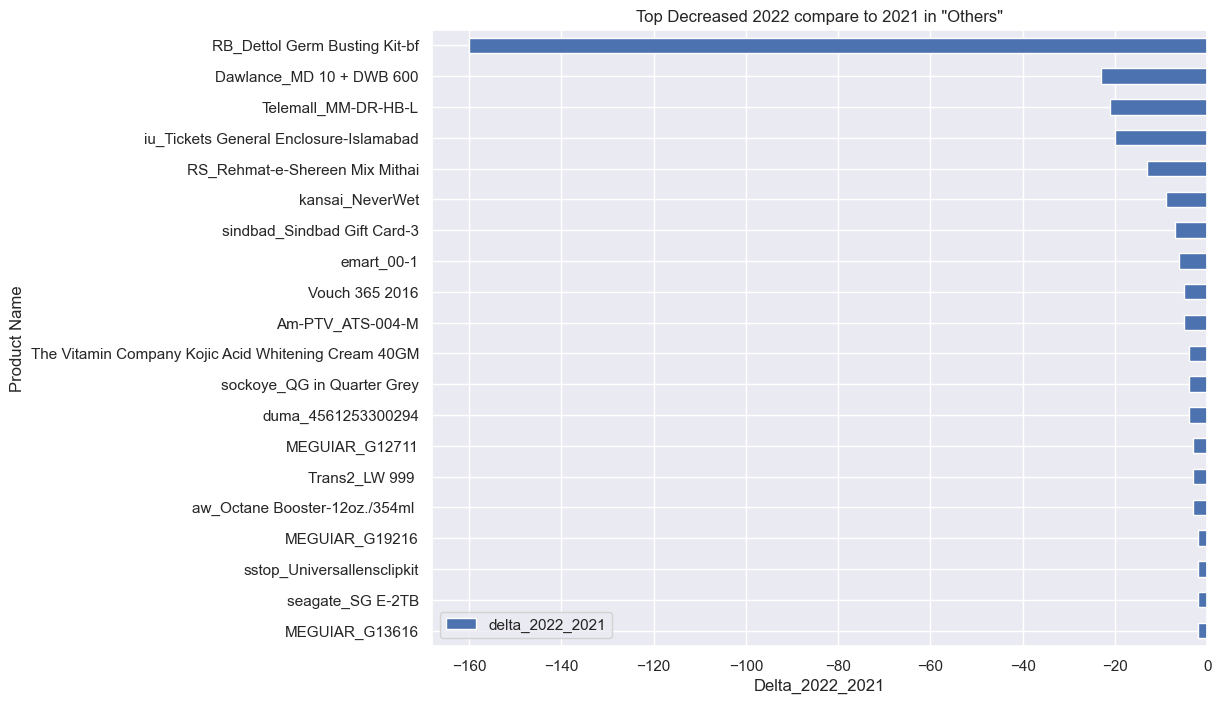

In [29]:
# Choose 20 products to show (from the smallest)
others_2021_2022=others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending= False, inplace= True)

# plot
sns.set()
others_2021_2022.plot(
    x='sku_name',\
    y='delta_2022_2021',\
    kind='barh',\
    figsize=(10,8)\
)
plt.title('Top Decreased 2022 compare to 2021 in "Others"')
plt.xlabel('Delta_2022_2021')
plt.ylabel('Product Name')

Dear Data Analyst,

As we prepare for the company's upcoming anniversary in two months, the Digital Marketing Team plans to share promotional information with customers by the end of this month. To support this initiative, we require data on customers who completed the check-out process but have not made a payment(is_gross=1) during the year 2022.
Specifically, we need the customer IDs and their Registered Dates.

We kindly request your assistance in  compiling and delivering this data to the Digital Marketing Team before the month's end. Your support in this matter is greatly appreciated.

Best Regards
Digital Marketing Team 


In [30]:
# define DataFrame with filter as requested
cs_gross_data = df[(df['is_gross'] == 1) & 
                   (df['is_valid'] == 0) & 
                   (df['is_net'] == 0) & 
                   (df['order_date'].dt.year == 2022)][['customer_id', 'registered_date']]

# show the data
cs_gross_data


,customer_id,registered_date
0,C993531L,2021-11-08
8,C652751L,2022-07-19
19,C189144L,2022-07-01
22,C224183L,2022-04-07
23,C907186L,2022-05-08
...,...,...
5729,C217246L,2022-08-04
5734,C577176L,2022-06-01
5742,C744990L,2022-05-21
5756,C317976L,2021-11-26


In [31]:
# validation
# Compare the unique "Customer_id" from the dataframes with count of dataframe index
# use Index
def check_customerid(x):
    unique_customerid=len(x['customer_id'].unique().tolist())
    rows_count=len(x.index)
    return ['unique_customerid','rows_count']


# run Validation
test = check_customerid(cs_gross_data)
print("Data Before: ", test)

# run Logic
if test[0]== test[1]:
    print("No Duplicate Data")
else:
    print("There is Duplicate Data")
    # Remove the duplicate
    cs_gross_data.drop_duplicates(inplace=True)
    print("Data After: " , check_customerid(cs_gross_data))


# reset the index
cs_gross_data.reset_index(drop=True, inplace= True)
# Show 
cs_gross_data

Data Before:  ['unique_customerid', 'rows_count']
There is Duplicate Data
Data After:  ['unique_customerid', 'rows_count']


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


Dear Data Analyst,

Between October and December 2022, We ran promotional Campaings every Saturday and Sunday. To evaluate their effectiveness, we would like your assistance in analyzing the following:

The average daily sales(before _discount) for weekends(Saturday and Sunday) compared to weekdays (Monday_Friday) for each month during this period. Please specify whether sales increased during weekends for  each month. 

The average daily sales(before_discount) for weekends versus weekdays across the entire three_month period.

We Kindly request the data to be shared with us by the end of next week. Thank you for your continued support.

Best regards, Campaign Team

In [32]:
# Answer 4.1

# add the columns month_id, month_name,. day_name, Year
df['month_id']=df['order_date'].dt.month
df['month_name']=df['order_date'].dt.month_name()
df['day_name']=df['order_date'].dt.day_name()
df['year']=df['order_date'].dt.year

# Create dataFrames for weekends data October_December 2022
data_weekends= pd.DataFrame(\
    df[(df['is_valid']==1) & (df['day_name'].isin(['Saturday','Sunday'])) & (df['month_id']>=10) & (df['year']==2022)]
    # groupby, aggregate before_discount
    .groupby(by=['month_id','month_name','year'])['before_discount'].mean().round(2)
    # convert series to dataframe
    .reset_index(name='avg_sales_weekend')
    .sort_values(by='month_id', ascending =True)
)

# Create dataFrames for weekdays data October_December 2022
data_weekdays= pd.DataFrame(\
    df[(df['is_valid']==1) & (df['day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) & (df['month_id']>=10) & (df['year']==2022)]
    # groupby, aggregate before_discount
    .groupby(by=['month_id','month_name','year'])['before_discount'].mean().round(2)
    # convert series to dataframe
    .reset_index(name='avg_sales_weekdays')
    .sort_values(by='month_id', ascending =True)
)

# merge both the dataframes
data_weekends_weekdays= data_weekdays.merge(data_weekends)

# show the data
data_weekends_weekdays

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekend
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


<Axes: xlabel='Month_name', ylabel='Average Sales'>

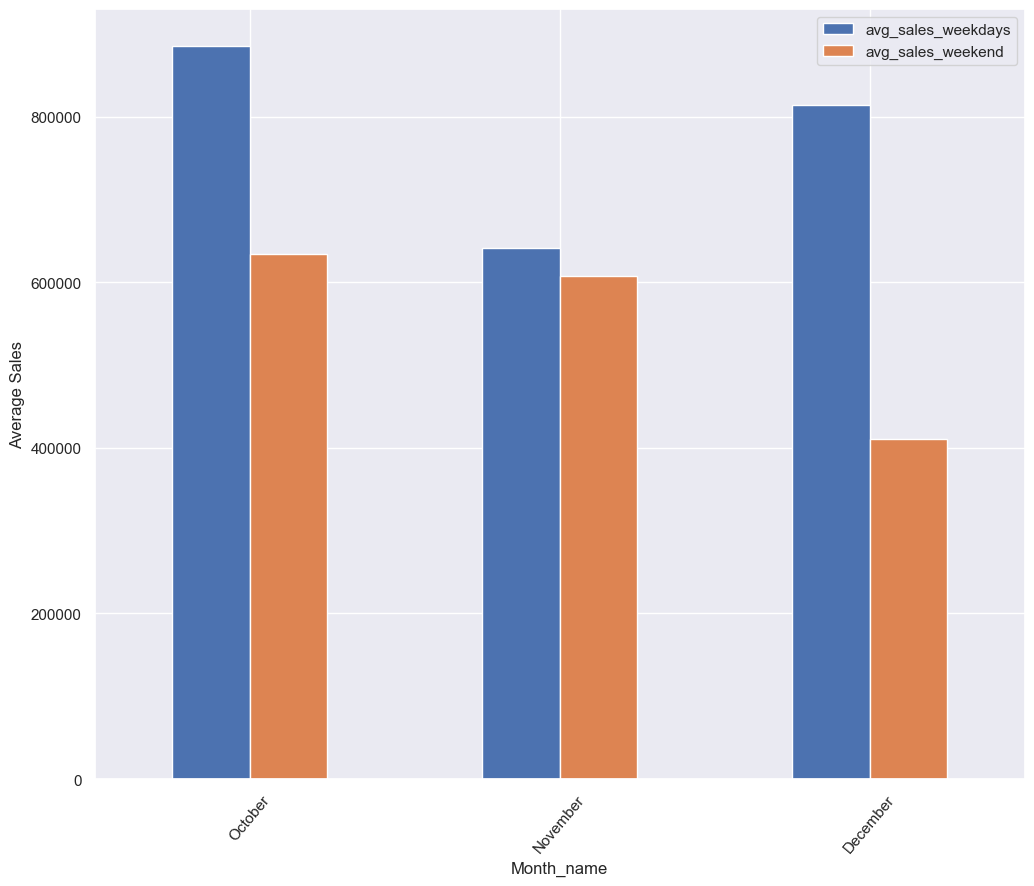

In [33]:
# Plot
sns.set()
data_weekends_weekdays.plot(
    x='month_name',
    y=['avg_sales_weekdays', 'avg_sales_weekend'],
    kind='bar',
    grid=True,
    xlabel='Month_name',
    ylabel='Average Sales',
    figsize=(12, 10),
    rot=50,
    table=False,
    secondary_y=False
)


In [34]:
# Answer 4.2
# Create dataFrames for weekends data October_December 2022
data_weekends_all= pd.DataFrame(\
    df[(df['is_valid']==1) & (df['day_name'].isin(['Saturday','Sunday'])) & (df['month_id']>=10) & (df['year']==2022)]
)

# Create dataFrames for weekdays data October_December 2022
data_weekdays_all= pd.DataFrame(\
    df[(df['is_valid']==1) & (df['day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) & (df['month_id']>=10) & (df['year']==2022)]
)

# Create Dictonary 
# Create Dictionary
all_month_avg_compare = {
    'Period': 'Total 3 Months',
    'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(), 2),
    'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(), 2),
    'Diff(Values)': round(
        data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(), 2),
    'Diff (%)': pd.Series(str(round(
        ((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean())/ data_weekdays_all['before_discount'].mean()) * 100, 2))) + '%'
}


# Create dataframe from dictionary
compare_avg_weekends_weekdays=pd.DataFrame(data=all_month_avg_compare, index=[0])

# show the data
compare_avg_weekends_weekdays

,Period,Avg Weekends Sales,Avg Weekdays Sales,Diff(Values),Diff (%)
0,Total 3 Months,558865.06,772341.0,-213475.94,-27.64%


<Axes: xlabel='Month_name', ylabel='Average Sales'>

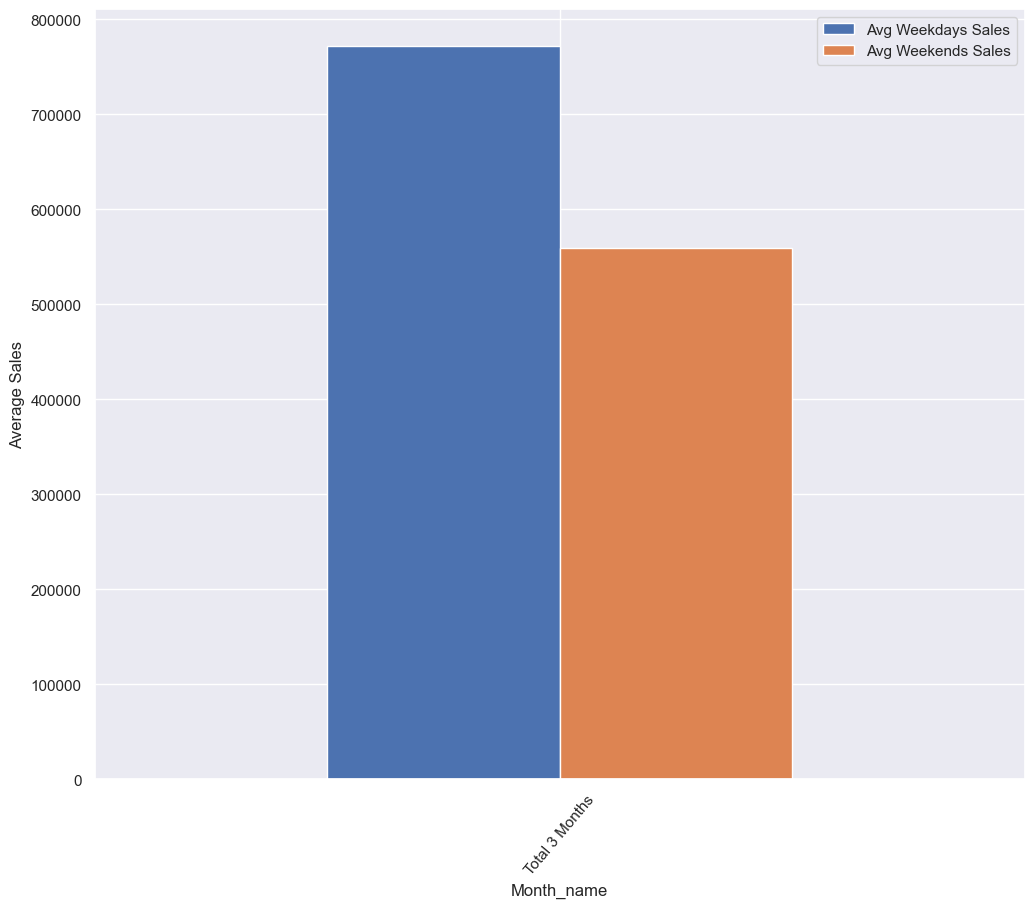

In [35]:
# Plot
sns.set()
compare_avg_weekends_weekdays.plot(
    x='Period',
    y=['Avg Weekdays Sales', 'Avg Weekends Sales'],
    kind='bar',
    grid=True,
    xlabel='Month_name',
    ylabel='Average Sales',
    figsize=(12, 10),
    rot=50,
    table=False,
    secondary_y=False
)


In [36]:
# specify the file path and name
file_path=r"C:\Users\Yogita\OneDrive\Desktop\Google Looker Project\dataset\finaldataset.csv"

# save to csv
df.to_csv(file_path, index= False)

print(f"File successfully saved to {file_path}")


File successfully saved to C:\Users\Yogita\OneDrive\Desktop\Google Looker Project\dataset\finaldataset.csv


                                                       INTERNSHIP TASKS

 Question 1: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. 

 
Requirements:
• Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. 
• Group the data by sku_name and category, and sum the qty_ordered for each product.
• Rank the products based on their total sales quantity in descending order. 
• Display the top 5 products with the highest sales quantities.
• Generate a horizontal bar chart showing the top 5 products by quantity. 

Key Features to Use: 
• category 
• order_date (for filtering by year) 
• is_valid (to filter valid orders) 
• sku_name (for product names) 
• qty_ordered (for sales quantities)


In [37]:
Sales_2022_Category=pd.DataFrame(\
       df[(df['category']=='Mobiles & Tablets') &  (df['is_valid']==1) & (df['order_date'].dt.year==2022)]
       # Grouping & sum  the qty_ordered for each the product &  reseting the index
       .groupby(by=['sku_name', 'category'])['qty_ordered'].sum().reset_index()
       # sorting in the descending order 
        .sort_values(by='qty_ordered', ascending = False)
)

# seelcting TOp 5 Por
Sales_2022_Category=Sales_2022_Category.head(5)
Sales_2022_Category

,sku_name,category,qty_ordered
1,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
2,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
3,Infinix Hot 4-Gold,Mobiles & Tablets,15
43,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
34,infinix_Zero 4-Grey,Mobiles & Tablets,10


Text(0.5, 0, 'Total Quantity Sold')

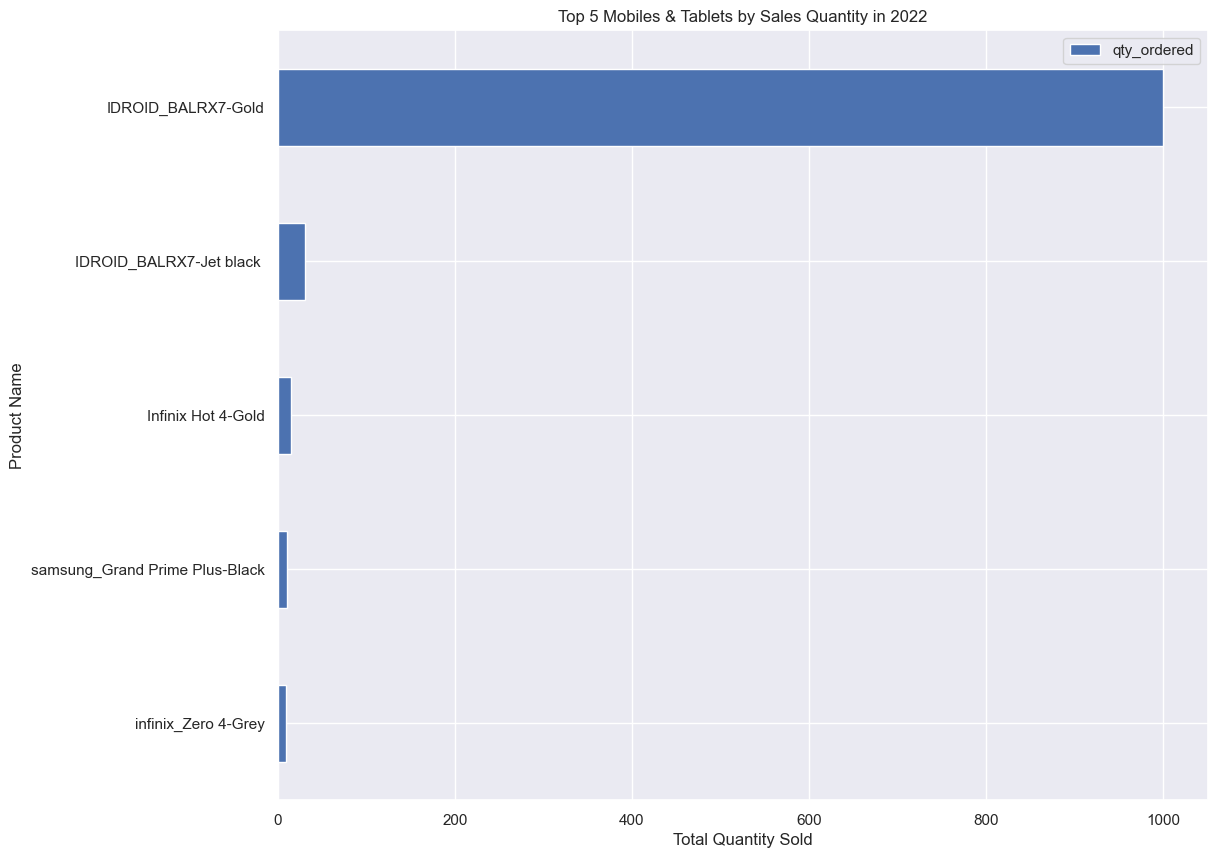

In [38]:
# Step 1: Sort ASCENDING
Sales_2022_Category = Sales_2022_Category.sort_values(by='qty_ordered', ascending=True)
sns.set()
Sales_2022_Category.plot(
    y='qty_ordered',
    x='sku_name',
    kind='barh',
    figsize=(12, 10)
)

# Step 3: Labels & title
plt.title('Top 5 Mobiles & Tablets by Sales Quantity in 2022')
plt.ylabel('Product Name')
plt.xlabel('Total Quantity Sold')

Question2 Sales Prediction for the Next Quarter Using Historical Data Scenario: The Sales Team wants to predict the total sales for the next quarter (Q2 2023) based on historical sales data.

Requirements:..
1 Use the sales data from Q1 2022 to Q4 2022 to build a model that predicts total sales for Q2 2023.
2 Evaluate the model’s accuracy using a relevant error metric (e.g., MAE, RMSE).
3 Provide predictions for the upcoming quarter and identify any trends. 

Key Features to Use: 
• order_date 
• qty_ordered 
• Machine learning model libraries (e.g., Scikit-learn, Statsmodels)

In [39]:
# add the columns month, Quarter 
df['month']=df['order_date'].dt.month
df['quarter']=df['order_date'].dt.quarter
# collect dataFrames
Sales_data_q1_to_q4_2022= pd.DataFrame(\
    # Collect the dataframes
    df[(df['order_date'].dt.year==2022)]
    # group the quarter & sum 
    .groupby(by=['quarter','year'])['qty_ordered']
    .sum()
)
# show 
Sales_data_q1_to_q4_2022

,,qty_ordered
quarter,year,
1,2022,2213
2,2022,2521
3,2022,2970
4,2022,497


In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# data according to Sales_data_q1_to_q4_2022
X=np.array([1,2,3,4]).reshape(-1,1)
Y=np.array([2213,2521,2970,497])

# model
model=LinearRegression()
model.fit(X,Y)

# Prediction
future_q=np.array([[6]])
prediction=model.predict(future_q)

# print the prediction
print(f"Predict Sales for Quarter_2 2023: ",int(prediction[0]))

# Evaluate the Model's accuarcy Using Mean Absolute Error(MAE), Root Mean Squared Error(RMSE) 
y_predict=model.predict(X)
mae=mean_absolute_error(Y, y_predict)
rmse=np.sqrt(mean_absolute_error(Y,y_predict))

# Print The values
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error : {rmse:.2f}")


Predict Sales for Quarter_2 2023:  405
Mean Absolute Error: 695.25
Root Mean Squared Error : 26.37


C:\Users\Yogita\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


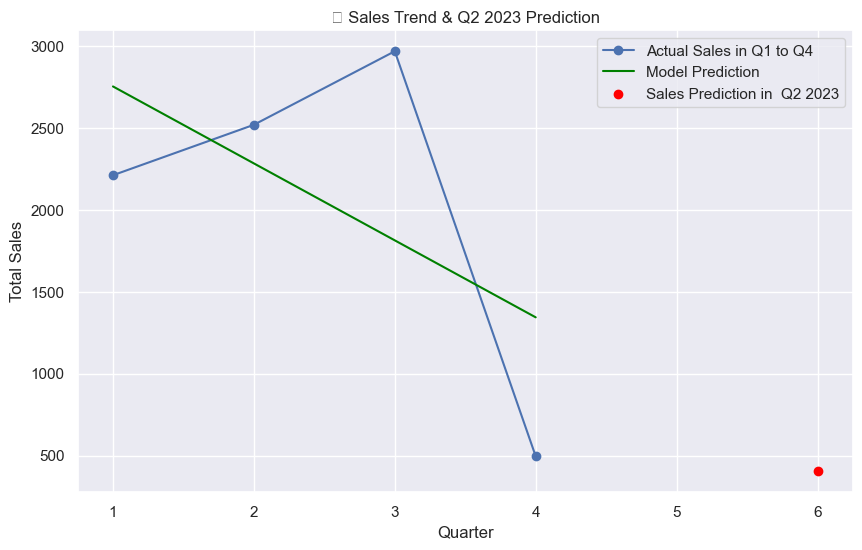

In [41]:
# plot the Graph
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(X, Y, marker='o', label='Actual Sales in Q1 to Q4')
plt.plot(X, y_predict, linestyle='-', label='Model Prediction', color='green')
plt.scatter(6, prediction, color='red', label='Sales Prediction in  Q2 2023')

plt.title('📈 Sales Trend & Q2 2023 Prediction')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5, 6])
plt.show()


Question 3 : 
Total Revenue vs Discount Impact by Category Scenario: 
The Marketing Team wants to analyze the total revenue for each product category before and after applying discounts. They also want to visualize the discount impact on revenue across different categories. 

Requirements: 
• Create a bar chart showing total revenue (before and after discount) for each product category. 
• Use the formula SUM(before_discount) for total revenue before discount and SUM(after_discount) for total revenue after discount. 
• Add a calculated field to show the discount impact (before_discount - after_discount). 
• Visualize the difference in revenue for each category. 

Key Features to Use:
• category 
• before_discount 
• after_discount

In [42]:
# Group the category & sum of the total revenue (before_discount, after_disc)
Category_scenario= df.groupby(by='category').agg({
    'before_discount':'sum',
    'after_discount':'sum'
}).reset_index()

# show 
Category_scenario

,category,before_discount,after_discount
0,Appliances,1.168138e+09,1.163484e+09
1,Beauty & Grooming,1.678716e+08,1.672164e+08
2,Books,2.000292e+07,1.980408e+07
3,Computing,1.173404e+09,1.170537e+09
4,Entertainment,1.295031e+09,1.286166e+09
5,Health & Sports,1.471447e+08,1.459642e+08
6,Home & Living,2.095420e+08,2.082169e+08
7,Kids & Baby,6.924850e+07,6.898116e+07
8,Men Fashion,2.747419e+08,2.734943e+08
9,Mobiles & Tablets,3.425098e+09,3.421068e+09


<Axes: xlabel='Category', ylabel='Revenue'>

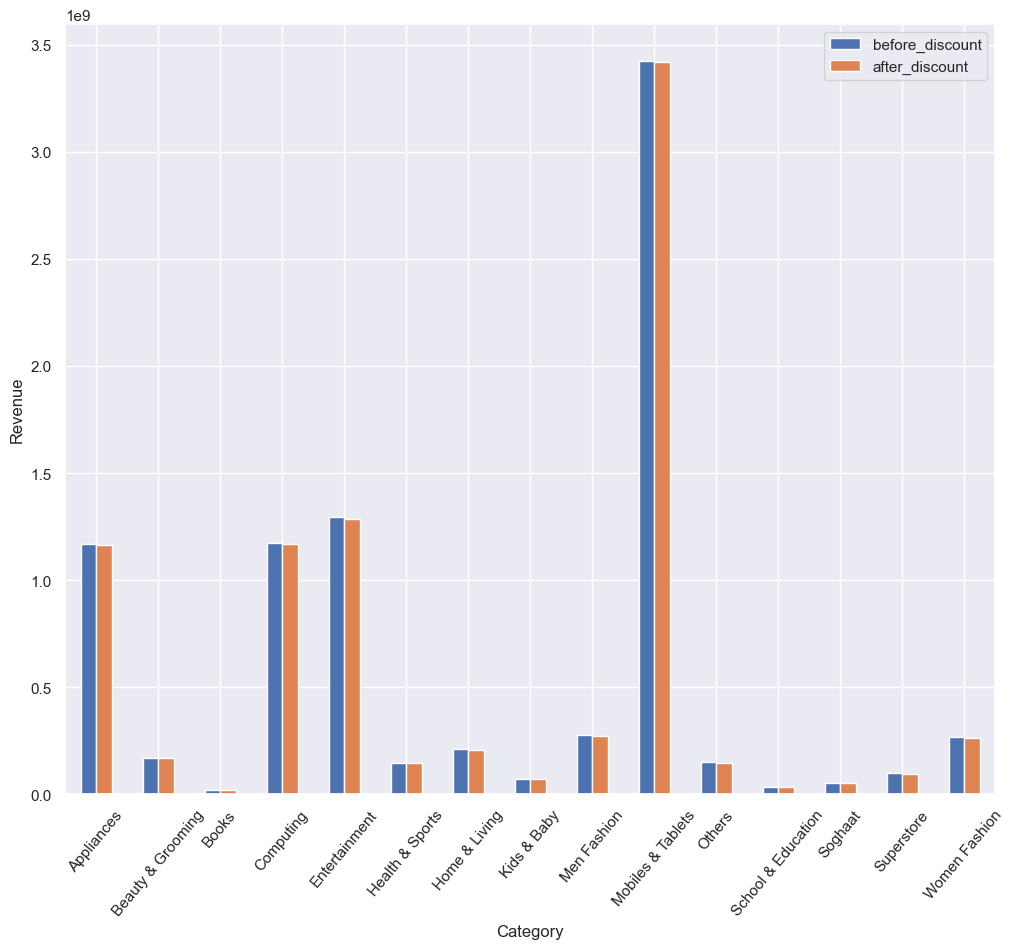

In [43]:
# add the column "Discount Impact"
Category_scenario['Discount Impact'] = Category_scenario['before_discount'] - Category_scenario['after_discount']
Category_scenario

# plot
sns.set()

Category_scenario.plot(
    y=['before_discount','after_discount'],
    x='category',
    kind='bar',
    figsize=(12,10),
    ylabel='Revenue',
    xlabel='Category',
    rot=50
)

Question 4  
Unique Customers and Repeat Purchases Analysis Scenario: 
The Customer Service Team wants to analyze how many customers made multiple purchases in 2022. 

Requirements: 
• Create a calculated field to count the number of distinct customers who made at least two purchases. Use the formula COUNT_DISTINCT(customer_id). 
• Create a scorecard showing the number of customers who made only one purchase and those who made more than one purchase. 
• Display the ratio of repeat customers to new customers. 

Key Features to Use: 
• customer_id 
• order_date

In [46]:

# filter the data for Year 2022order_2022=pd.DataFrame(\
orderin_2022=df[(df['order_date'].dt.year==2022)].groupby(by='customer_id').size().reset_index(name = 'Count')
orderin_2022
# Customers
Total_Customers=orderin_2022.shape[0]
Unique_Customers=orderin_2022[orderin_2022['Customer Type']=='One-Time Customers']
Repeat_Customers=orderin_2022[orderin_2022['Customer Type']>='Repeat Customers']

Repeat_Customers_ratio=Repeat_Customers.shape[0]/Unique_Customers.shape[0]

# Dsiplay the "Unique Customers", "Repeat Customers" , "Repeat Customers Ratio" & "Total Customers"
print(f"Unique Customers : {Unique_Customers.shape[0]}")
print(f"Repeat Customers : {Repeat_Customers.shape[0]}")
print(f"Total Customers : {Total_Customers}")
print(f"Repeat Customers Ratio : {Repeat_Customers_ratio:.2f}")

Unique Customers : 2006
Repeat Customers : 353
Total Customers : 2359
Repeat Customers Ratio : 0.18
Saved finaldataset


<Axes: title={'center': 'Unique vs Repeat Customers'}, xlabel='No.of Customers', ylabel='Customer Type'>

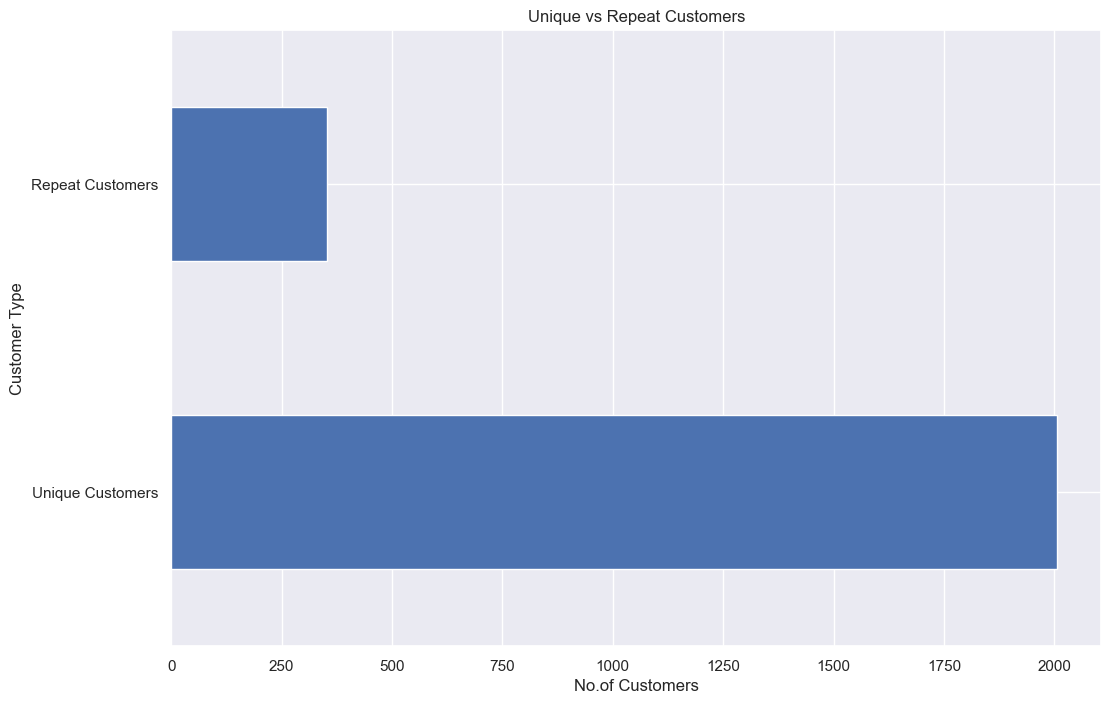

In [45]:
# Step 4: Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Customer_Type': ['Unique Customers', 'Repeat Customers'],
    'Total_Customers': [Unique_Customers.shape[0], Repeat_Customers.shape[0]]
})

# plot

sns.set()
plot_df.plot(
    x='Customer_Type',
    y='Total_Customers',
    kind='barh',
    grid=True,
    xlabel='No.of Customers',
    ylabel='Customer Type',
    title='Unique vs Repeat Customers',
    figsize=(12, 8),
    legend=False
)